In [1]:
import os

In [2]:
os.chdir('/home/ak/Projects/ature')

In [3]:
from commons.IMAGE import Image
from commons.ImgLATTICE import Lattice
import preprocess.utils.img_utils as imgutils
from commons.MAT import Mat
from PIL import Image as IMG

In [4]:
os.chdir('/home/ak/Projects/ature/data/av_wide_data_set')
file = Mat(file_name='wide_image_03.mat')
original = file.get_image('I2')[:,:,1]

In [5]:
img = Image(image_arr=original)

In [6]:
img.apply_bilateral()

INFO:root:Applying Bilateral filter.


------[ RUNNING Time: 2.5725767612457275 seconds ]------


In [7]:
# IMG.fromarray(img.diff_bilateral)

In [8]:
img.apply_gabor(kernel_bank= imgutils.get_chosen_gabor_bank())

INFO:root:Applying Gabor filter.


------[ RUNNING Time: 8.672783374786377 seconds ]------


In [9]:
# IMG.fromarray(img.img_gabor)

In [10]:
# -------CONSTANTS--------
SKELETONIZE_THRESHOLD = 20

# Image lattice constants
IMG_LATTICE_EIGHT_CONNECTED = False
IMG_LATTICE_COST_ASSIGNMENT_ALPHA = 5

IMG_LATTICE_COST_ORIGINAL_IMAGE_CONTRIBUTION = 0.4
IMG_LATTICE_COST_GABOR_IMAGE_CONTRIBUTION = 0.6

# MST algorithm parameters
SEGMENTATION_THRESHOLD = 7.5

In [11]:
img.create_skeleton(threshold=SKELETONIZE_THRESHOLD, kernels=imgutils.get_chosen_skeleton_filter())
seed_node_list = imgutils.get_seed_node_list(img.img_skeleton)

------[ RUNNING Time: 0.008827686309814453 seconds ]------


In [12]:
lattice = Lattice(image_arr_2d=img.img_gabor)

In [13]:
lattice.generate_lattice_graph(eight_connected=IMG_LATTICE_EIGHT_CONNECTED)

INFO:root:Creating 4-connected lattice.


------[ RUNNING Time: 16.915234565734863 seconds ]------


In [14]:
import preprocess.algorithms.fast_mst as fmst

In [15]:
graph = fmst.run_segmentation(image_object=img,
                      lattice_object=lattice,
                      seed_list=seed_node_list,
                      segmentation_threshold=SEGMENTATION_THRESHOLD,
                      alpha=IMG_LATTICE_COST_ASSIGNMENT_ALPHA,
                      img_gabor_contribution=IMG_LATTICE_COST_GABOR_IMAGE_CONTRIBUTION,
                      img_original_contribution=IMG_LATTICE_COST_ORIGINAL_IMAGE_CONTRIBUTION)

------[ RUNNING Time: 143.6483497619629 seconds ]------


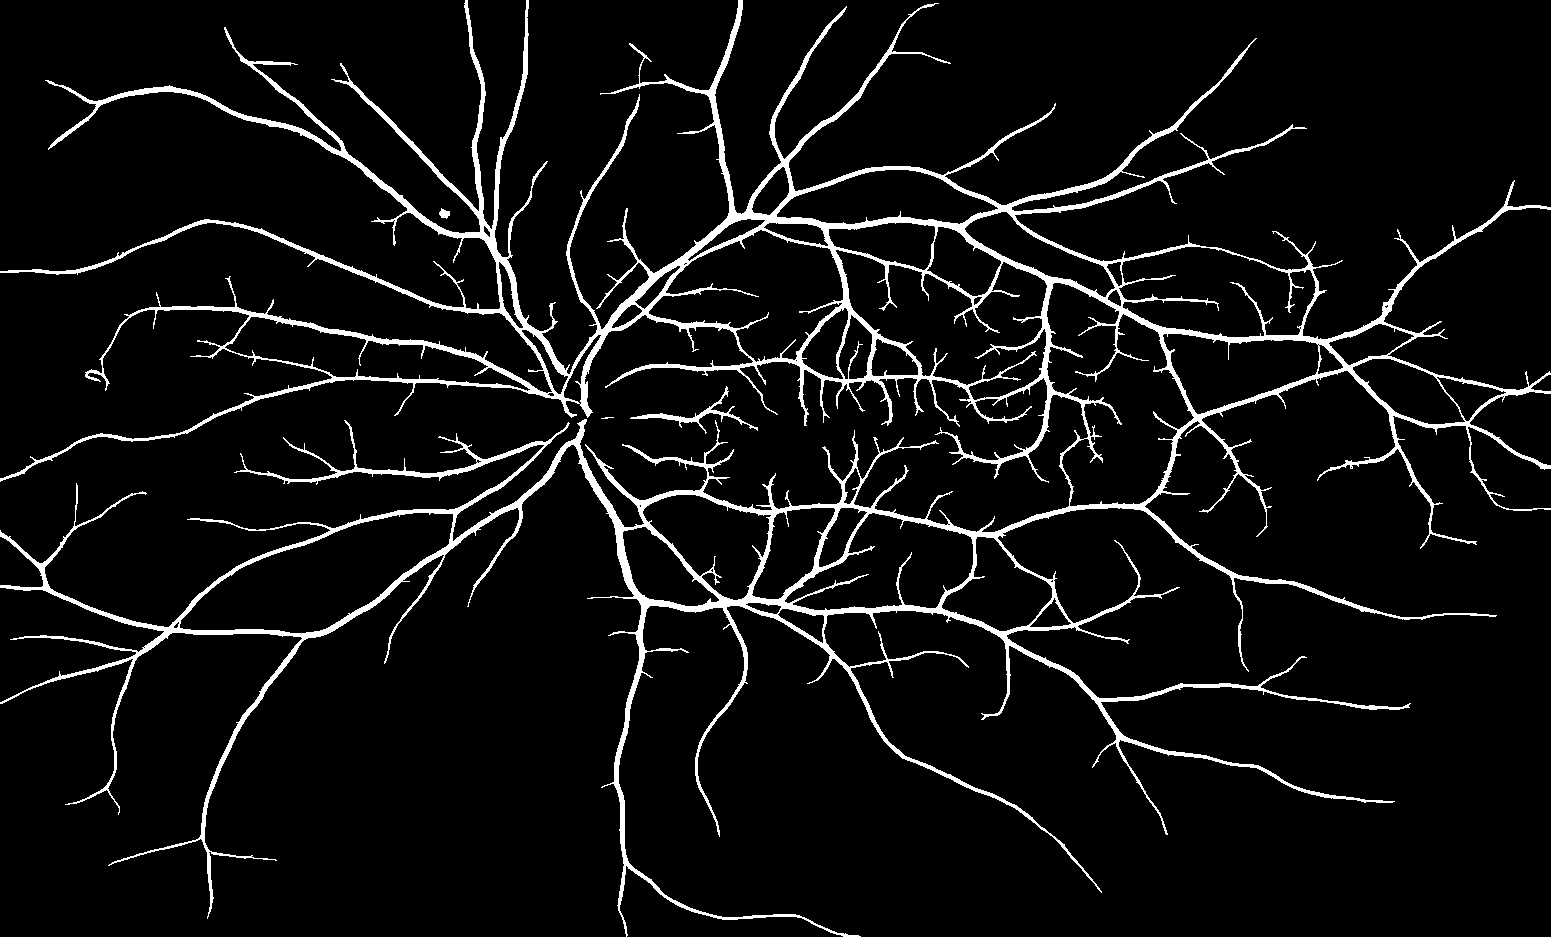

In [16]:
IMG.fromarray(lattice.accumulator)